In [2]:
from scipy.io import arff
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
data = arff.loadarff('1year.arff')
df = pd.DataFrame(data[0])
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [4]:
print(df.shape)
df = df.dropna()
df.shape

(7027, 65)


(3194, 65)

In [5]:
    features = []
    for i in range(1,65):
        features.append("Attr"+str(i))
    features.append("class")
    x = df.loc[:, features].values
    x = StandardScaler().fit_transform(x)
    pd.DataFrame(data = x, columns = features).head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1.005223,-0.640918,1.141125,0.130389,-0.009028,0.438844,1.169146,-0.041354,-0.232201,0.275097,...,0.303058,0.355870,-0.317356,-0.063455,-0.156390,-0.173784,-0.098988,-0.233386,0.014057,-0.097374
1,-0.623738,0.398244,-0.392319,-0.401950,-0.012993,-0.113036,-0.643936,-0.305653,-0.105240,-0.292913,...,0.754929,-0.262617,-0.597844,-0.002817,-0.142681,-0.204375,0.179430,-0.408496,-0.195669,-0.097374
2,1.567743,-0.762608,2.103501,0.695216,-0.008422,0.682736,1.803308,0.144861,-0.240107,0.876950,...,0.229546,0.377561,-0.244440,-0.050629,-0.146281,-0.157022,-0.465006,0.469223,1.133708,-0.097374
3,-0.124401,-1.384393,-0.267795,0.656659,-0.005737,0.189236,-0.153703,0.911794,-0.155031,1.503561,...,0.943992,-0.162990,-0.953098,-0.028708,-0.158192,-0.253596,-0.283601,-0.008766,-0.293576,-0.097374
4,-0.948645,-1.333116,1.392749,3.325582,-0.007588,-0.098271,-1.022130,0.807030,-0.307214,1.451886,...,-0.461549,-0.364705,0.441094,-0.031491,-0.200169,0.037214,-0.517338,0.730235,-0.234844,-0.097374


In [6]:
pca = PCA()
principalComponents = pca.fit_transform(x)
principalComponents = pd.DataFrame(principalComponents)
principalComponents.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,3.621567,0.933470,0.894974,-1.073791,0.533516,-0.982210,-0.467674,0.090887,0.540251,0.234482,...,-0.028503,-0.060138,0.015099,-0.010528,0.011034,-0.000790,-0.000500,0.000003,1.952664e-14,1.260708e-14
1,-1.862152,0.474585,1.117996,-0.660343,-0.413499,-0.537358,0.327790,-0.127736,-0.195789,-0.570494,...,0.008019,0.061235,-0.036902,0.027091,-0.003655,0.001520,-0.000784,-0.000050,-6.916505e-16,6.905448e-16
2,5.482133,0.107207,-1.140051,0.640900,3.107889,-1.563315,-1.646069,0.369389,-0.102498,0.233611,...,-0.094893,0.021214,-0.000766,-0.024499,-0.030612,-0.000161,0.000349,0.000036,2.590640e-16,1.263226e-16
3,3.625197,-0.682670,3.815345,-2.418331,-0.680330,-0.393268,1.464389,0.085330,1.152064,-0.760480,...,0.026881,0.008234,-0.008507,0.014757,0.026998,-0.003791,-0.003442,0.000034,-6.783032e-17,1.291485e-16
4,-0.894264,-7.066547,1.452710,-0.337899,0.233910,0.069875,-0.044535,-0.317713,1.262071,-1.103982,...,-0.006819,-0.003681,-0.012247,-0.013317,-0.014013,0.000177,0.000647,-0.000044,2.879012e-17,-5.106821e-17


In [7]:
explained_variance = pca.explained_variance_ratio_
compteur = 0
for i in range(0, 29):
    compteur += explained_variance[i]
print(compteur)

0.9439891563081817


In [8]:
pca = PCA(n_components=29)
principalComponents = pca.fit_transform(x)
for i in range(0, 29):
    df['PC' + str(i + 1)] = principalComponents[:, i]
df.head()
# We reduced number of axis from 64 to 30 (~45% of initial data was kept)
# Together, the first 30 principal components contain 95% of the information.

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29
0,0.200550,0.37951,0.396410,2.0472,32.351,0.388250,0.249760,1.33050,1.1389,0.50494,...,-1.550319,1.077339,0.478662,-0.964641,-0.090806,0.038096,-0.279184,-0.010068,0.080672,0.098710
8,0.009020,0.63202,0.053735,1.1263,-37.842,0.000000,0.014434,0.58223,1.3332,0.36798,...,-0.658962,-0.996384,-0.285024,0.736967,0.335729,-1.791627,-0.087619,0.537148,0.237545,0.112572
12,0.266690,0.34994,0.611470,3.0243,43.087,0.559830,0.332070,1.85770,1.1268,0.65006,...,0.164839,0.408951,-0.093622,0.264515,0.002790,0.159569,-0.251705,0.003253,-0.255948,-0.363963
13,0.067731,0.19885,0.081562,2.9576,90.606,0.212650,0.078063,4.02900,1.2570,0.80115,...,0.080071,-1.659390,-0.949788,-1.162428,0.521915,-0.452473,0.881548,-0.382030,0.893682,-0.212651
14,-0.029182,0.21131,0.452640,7.5746,57.844,0.010387,-0.034653,3.73240,1.0241,0.78869,...,0.011264,1.081538,0.881251,1.204470,0.462070,-0.098520,-1.048580,-0.593346,-0.891031,1.029230


In [9]:
# x50 et x55 are the two axis that can tell if a company bankrupt

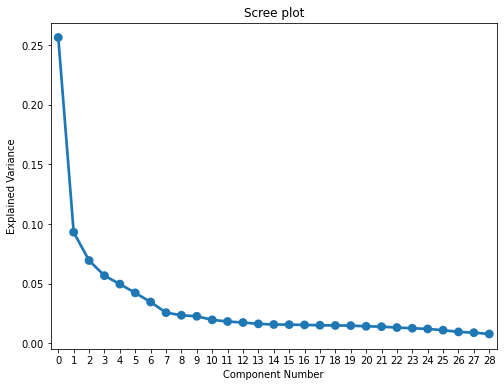

In [10]:
ind = np.arange(0, 29)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

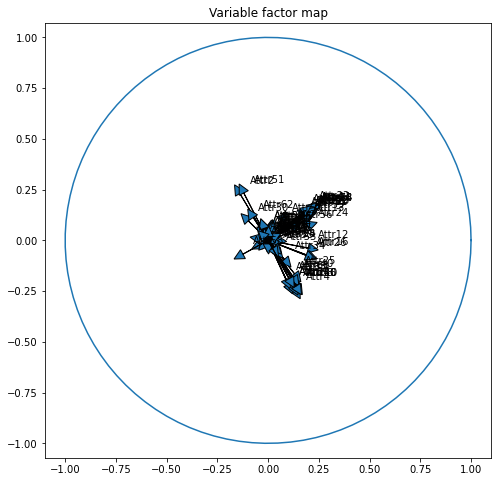

In [11]:
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.05,
             head_length=0.05)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

# We don't see very well, let's zoom a bit

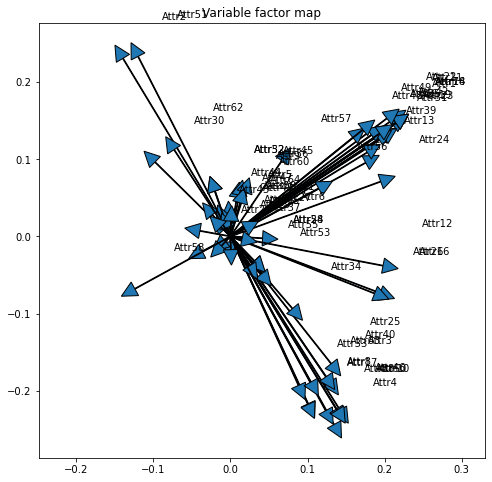

In [14]:
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.02,
             head_length=0.02)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])


#an = np.linspace(0, 0.001 * np.pi, 100)
#plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

# A lot of variables are correlated that's why we can have 95% of informations with less than 50% of initial data